# IMDB影評文字評價分析

## 資料預處理 

In [1]:
import urllib.request
import os
import tarfile

url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)
    
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open("data/aclImdb_v1.tar.gz", 'r:gz')
    result = tfile.extractall('data/')

downloaded: ('data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x1049f3940>)


In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>') #移除html裡面的各種tag
    return re_tag.sub('', text) #把tag的東西替換成空白

import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list = []

    positive_path = path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path+f]
    
    negative_path = path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list += [negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts


y_train, train_text = read_files("train")
y_test, test_text = read_files("test")

Using TensorFlow backend.


read train files: 25000
read test files: 25000


In [3]:
train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [4]:
y_train[0]

1

### 高頻率字典建立！！ 

In [5]:
#最高頻率2000字
token = Tokenizer(num_words=2000)
token.fit_on_texts(train_text) #用token讀取新文字 

print(token.document_count)

25000


In [7]:
print(token.word_index)

{'hirohisa': 75576, 'cuddly': 15554, "corey's": 86757, 'realllllllllly': 73331, 'refering': 61868, 'carribbean': 37594, 'perceiving': 50774, 'refreshing': 2424, 'hilda': 15989, 'trampoline': 34273, 'shortages': 25511, 'magnum': 11790, 'yvone': 54407, 'mccheese': 41906, "energy's": 73120, "ratner's": 59015, 'comedylooser': 89172, 'probalby': 55214, 'juxtapose': 29573, 'snappy': 9702, 'speculation': 16184, 'bluto': 51742, 'regain': 9540, 'nolin': 72946, 'milennium': 82471, 'cutitta': 54905, 'heffron': 57851, 'peggey': 85121, 'incredibles': 39486, 'cranks': 28731, 'cord': 14723, "loop'": 85623, 'shudders': 39121, 'p9fos': 87056, 'raphael': 73148, 'pharmacist': 28527, 'femme': 5207, 'hobbit': 20494, 'shamefully': 15552, 'contradictory': 16419, 'characterful': 64859, 'bernard': 5345, 'trilling': 27530, 'lightsaber': 47405, 'primadonna': 63270, 'unthinkable': 15088, 'boosh': 70902, 'furballs': 47354, 'cavorting': 18169, 'jaysun': 67879, 'terrified': 5637, 'creepy': 943, 'syntax': 89542, 'sim

### 把text利用字典轉成數字list 

In [8]:
#只有在字典裡的字會轉換
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq  = token.texts_to_sequences(test_text)

In [9]:
print(x_train_seq[0])

[308, 6, 3, 1068, 208, 8, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 6, 72, 5, 631, 70, 6, 1, 5, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 798, 5, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 142, 129, 5, 27, 4, 125, 1470, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 11, 8, 214]


### 轉換後的數字長度相同

In [10]:
#由於ML的矩陣都是要長一樣的才能運算，所以取最多字100
#如果超過100字從前面開始砍掉，如果少於100字從前面開始補0
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

In [11]:
x_train[12499]

array([  33,  187,  843,   19,  236,    2,    3,   21,   66,  238,  477,
          1,  356, 1252,    4,  663,  886,    3,  124,  421,    6,   34,
        141,    8,   19, 1914,    2,    1,  592,  797,    6,    3,  944,
         17,   41,  127,    3, 1329,  935,   46,   22,   53,    5,  617,
       1336,   56,    1,    6,   39,    3,  110,   14,    1,  115,   61,
          2,   53,  143,  147,    1,  101,   22,    3,  223,    2,    1,
        828,   22,  176,    5,   31,  217,    1, 1961,    6, 1046,    2,
         76,  165,    8,  875,    5,  147,  130,  103,  101, 1829,    3,
        650,  273,    2,    1,  427,  583,   62,   25,   97,   81,   92,
         35], dtype=int32)

## 使用 MLP跑模型 (文字分析特別加入Embedding層)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                48015     
_________________________________________________________________
dropout_8 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
__________

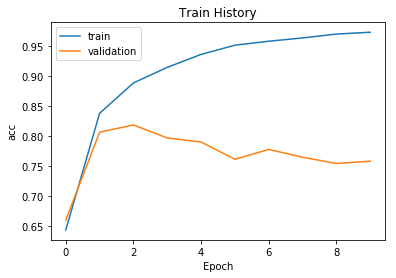

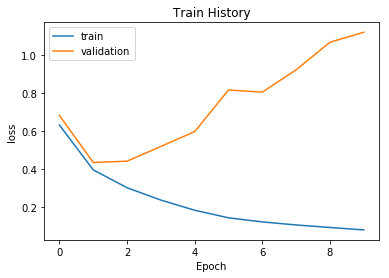

24768/25000 [============================>.] - ETA: 0s

accuracy= 0.82092
24608/25000 [============================>.] - ETA: 0s
 model saved to disk


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding

#設計模型
model = Sequential()

#Embedding，把文字向量投影到多維度向量（語意），否則數字之間無關聯，沒能體現出語言之間有「語意」
#在此投影成32維度
model.add(Embedding(output_dim = 32,
                    input_dim = 2000,
                    input_length = 100))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())


#訓練模型
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                          validation_split=0.2, batch_size=100, epochs=10, verbose=2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
model.save_weights("Savemodel_Keras/IMDB_MLP.h5")
print('\n model saved to disk')

#看起來是overfitting...

## MLP 統計、預測

In [19]:
#查看預測結果

SentimentDict={1:'正面的',0:'負面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('標籤label:',SentimentDict[y_test[i]],
          '預測結果:',SentimentDict[predict_classes[i]])

display_test_Sentiment(1)

Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO's "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpected psychologic

## MLP實測 Dunkirk評論

In [22]:
#新的input一律寫成input_text

def predict_review(input_text): #如同前面的標準化資料預處理
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=100)
    predict_result=model.predict_classes(pad_input_seq)
    print(SentimentDict[predict_result[0][0]])

predict_review('''Dunkirk is, in my opinion, yet another masterpiece from mastermind Christopher Nolan. Since everything that is brilliant about the film has already been said I will briefly write what I think of the film and also touch on a topic that some people are criticizing the movie for.

The fantastically directed film is told from 3 perspectives non chronologically. It superbly tackles the narrative and the non linear story doesn't at all pull you away from the intensity of the events happening on screen that don't stop from 00:00 to the last scene. Hans Zimmer most likely gives one of the most fitting scores for a war film ever. Sometimes there is only one note playing followed by heartbeat sounds and a ticking clock while other times a massive orchestra is interpreting what is going on on screen. The movie brilliantly projects the feeling of each and every soldier on the beach to the audience. Confusion, turmoil and fear. The cinematography was breathtaking and I felt anxious throughout most of the run time. There is no lead in this film and I can't really say anyone stuck out as giving a brilliant performance because it wasn't needed and I'll explain why.''')

1/1 [==============================] - 0s
正面的


# 使用RNN跑模型（時間序列，但是會有long-term dependency效果）

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 32)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_14 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 69,393
Trainable params: 69,393
Non-trainable params: 0
_________________________________________________________________
None
T

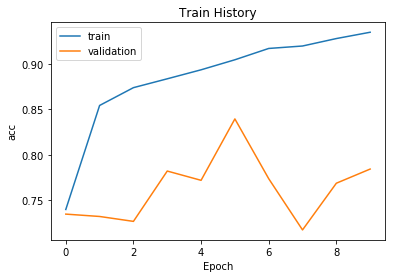

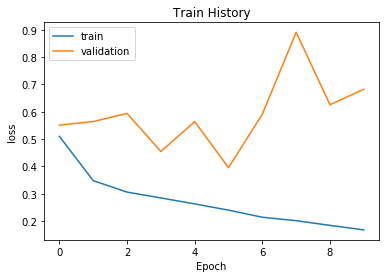

24992/25000 [============================>.] - ETA: 0s

accuracy= 0.82572
25000/25000 [==============================] - 38s    

 model saved to disk


In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN #改SimpleRNN

model = Sequential()

model.add(Embedding(output_dim=32,
                    input_dim=2000, 
                    input_length=100))
model.add(Dropout(0.35))

model.add(SimpleRNN(units=16)) ##改SimpleRNN

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid' ))

print(model.summary())

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
model.save_weights("Savemodel_Keras/IMDB_RNN.h5")
print('\n model saved to disk')

# 使用LSTM跑模型（時間序列，遺忘遙遠事情，解決long-term dependency）

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM #改成LSTM

model = Sequential()

model.add(Embedding(output_dim=32,
                    input_dim=2000, 
                    input_length=100))
model.add(Dropout(0.35))

model.add(LSTM(units=8)) #改LSTM

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid' ))

print(model.summary())

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
model.save_weights("Savemodel_Keras/IMDB_LSTM.h5")
print('\n model saved to disk')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2304      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 67,873
Trainable params: 67,873
Non-trainable params: 0
_________________________________________________________________
None
T

KeyboardInterrupt: 